In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [39]:
# matplotlib figures styling
plt.rcParams['figure.figsize'] = [10, 5]
plt.style.use('fivethirtyeight')

In [2]:
df=pd.read_csv('parts_cleaned.csv')

C:\Users\Brian\AppData\Local\Temp\ipykernel_10272\3263349447.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('parts_cleaned.csv')


In [125]:
# Add info from basic data df

In [11]:
df.head(5)

,Unnamed: 0,count_images,count_views,date_created_x,date_edited,date_moderated,description,id,price_history,region_name,region_text,title,url,Condition,Type,Make,Subtype,Interior Accessories,Exterior Accessories,Headlights and Lighting,Audio Parts,Suptype,Wheels and Parts,Safety and Security,Engine and Drivetrain,Oils and Fluids,Car Care,Watercraft and Boats,Motorcycle Parts,is_closed,value,advert_id,advert_price,adverts_count,chat_on,date_created_y,feedback_count,seller_id,last_seen,seller_name,seller_phone,status,user_response_time
0,0,1.0,34,"Thu, 30 Jun 2022 07:38:02 GMT",NaN,"Thu, 30 Jun 2022 07:56:49 GMT",Good quality for use,10502792,False,Nairobi Central,"Nairobi, Nairobi Central",Car Wash Machine on Offer,https://jiji.co.ke/nairobi-central/car-parts-a...,Brand New,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,26500,10502792,26500,3923,True,10m,0,3696862,5 hours,Tabitha enterprises,NaN,active,Typically replies within a few hours
1,1,2.0,138,"Fri, 08 Jul 2022 07:12:58 GMT",NaN,"Fri, 08 Jul 2022 07:53:28 GMT",ABRO radiator coolant red 4 litres,10598516,False,Nairobi Central,"Nairobi, Nairobi Central",Radiator Coolant ABRO Red 4L,https://jiji.co.ke/nairobi-central/car-parts-a...,Brand New,Oils & Fluids,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1000,10598516,1000,150,True,1y 2m,2,3463452,3 hours,Genesil Autobrake & Accessories Ltd,NaN,active,Typically replies within a few hours
2,2,1.0,20,"Tue, 18 Jan 2022 10:22:08 GMT",NaN,"Tue, 18 Jan 2022 16:26:02 GMT",Air Filter - Audi (4G0-133-843-L),8586019,False,Industrial Area Nairobi,"Nairobi, Industrial Area Nairobi",Air Filter - Audi (4g0-133-843-L),https://jiji.co.ke/viwandani-makadara/car-part...,Brand New,Engine & Drivetrain,Audi,Air Filters & Intake Systems,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,2000,8586019,2000,184,True,1y 10m,28,2786121,5 hours,VIPPS AUTO PARTS,NaN,active,Typically replies within a few hours
3,3,1.0,49,"Fri, 14 Jan 2022 14:39:24 GMT","Mon, 13 Jun 2022 06:26:53 GMT","Mon, 13 Jun 2022 06:26:53 GMT",Archive: Imported and genuine ex Japan auto pa...,8544009,False,Ngara,"Nairobi, Ngara",Archive: Stearings for Small Cars.,https://jiji.co.ke/ngara/car-parts-and-accesso...,Used,Other,Other Make,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,6000,8544009,6000,3,True,2y 3m,10,2416590,4 hours,AIRBAG WORLD AUTO SPARES,NaN,active,Typically replies within a day
4,4,1.0,29,"Mon, 18 Jul 2022 11:45:17 GMT",NaN,"Mon, 18 Jul 2022 12:11:00 GMT",Archive: Livguard Din100.12v/100ah spill proof...,10691542,False,Nairobi Central,"Nairobi, Nairobi Central",Archive: Livguard Din 100.12/100ah Maintenance...,https://jiji.co.ke/nairobi-central/car-parts-a...,Brand New,Interior Accessories,Other Make,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,10500,10691542,10500,114,True,2y 7m,0,2189462,4 hours,Tere Electronics,NaN,active,Typically replies within a few hours


In [5]:
df.shape

(17112, 43)

In [8]:
pd.set_option('display.max_columns', 50)

In [13]:
df.loc[:,['value', 'advert_price']]

,value,advert_price
0,26500,26500
1,1000,1000
2,2000,2000
3,6000,6000
4,10500,10500
...,...,...
17107,7999,7999
17108,50000,50000
17109,4500,4500
17110,14500,14500


In [15]:
df.columns

Index(['Unnamed: 0', 'count_images', 'count_views', 'date_created_x',
       'date_edited', 'date_moderated', 'description', 'id', 'price_history',
       'region_name', 'region_text', 'title', 'url', 'Condition', 'Type',
       'Make', 'Subtype', 'Interior Accessories', 'Exterior Accessories',
       'Headlights and Lighting', 'Audio Parts', 'Suptype', 'Wheels and Parts',
       'Safety and Security', 'Engine and Drivetrain', 'Oils and Fluids',
       'Car Care', 'Watercraft and Boats', 'Motorcycle Parts', 'is_closed',
       'value', 'advert_id', 'advert_price', 'adverts_count', 'chat_on',
       'date_created_y', 'feedback_count', 'seller_id', 'last_seen',
       'seller_name', 'seller_phone', 'status', 'user_response_time'],
      dtype='object')

In [16]:
df.drop(['Unnamed: 0','value'], inplace=True, axis=1)

# Basic EDA - Exploring numerical variables with histograms

In [28]:
df.describe()

,count_images,count_views,id,advert_id,advert_price,adverts_count,feedback_count,seller_id,seller_phone
count,17110.000000,17112.000000,1.711200e+04,1.711200e+04,17112.000000,17112.000000,17112.000000,1.711200e+04,0.0
mean,1.530275,37.096365,7.634378e+06,7.634378e+06,19371.868806,1627.028401,14.292309,2.077665e+06,NaN
std,1.359291,43.332179,2.817168e+06,2.817168e+06,32268.570419,2037.904634,24.238273,9.704879e+05,NaN
min,1.000000,1.000000,1.394410e+05,1.394410e+05,150.000000,0.000000,0.000000,1.602900e+04,NaN
25%,1.000000,11.000000,5.673981e+06,5.673981e+06,4000.000000,209.000000,1.000000,1.938176e+06,NaN
50%,1.000000,29.000000,8.658077e+06,8.658077e+06,10000.000000,932.000000,6.000000,2.070961e+06,NaN
75%,1.000000,48.000000,1.007699e+07,1.007699e+07,20525.000000,2000.000000,15.000000,2.496023e+06,NaN
max,22.000000,1334.000000,1.084467e+07,1.084467e+07,850000.000000,24469.000000,265.000000,4.441155e+06,NaN


In [ ]:
# Function to create histograms for numerical values of interest
ls_numerical = ['count_images','count_views', 'advert_price', 'feedback_count']

In [88]:
def plot_hist(column_name, log_scale, quantile):
    max=df[column_name].quantile(quantile)
    filt = df[column_name]<max
    x = df.loc[filt][column_name]

    plt.title(f'Distribution for {column_name}')
    plt.xlabel(f'{column_name}')
    plt.ylabel('Number of Items')

    #Add the median & mean lines
    median_price = x.median()
    mean_price = x.mean()
    plt.axvline(median_price, color='black', label= 'Median')
    plt.axvline(mean_price, color='red', label= 'Mean')

    #Plot the hist
    plt.legend()

    plt.hist(x, bins=20, log=log_scale, edgecolor='white')
    plt.show()
    

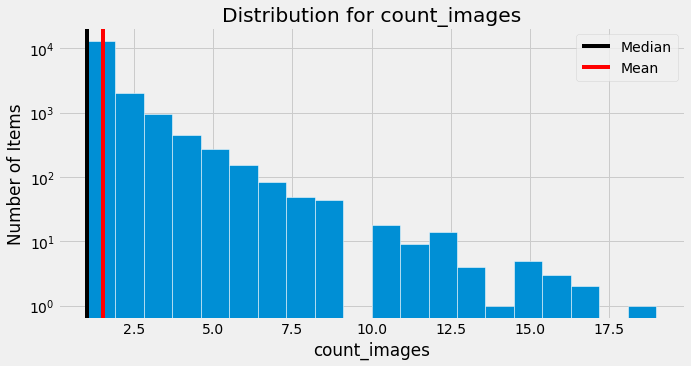

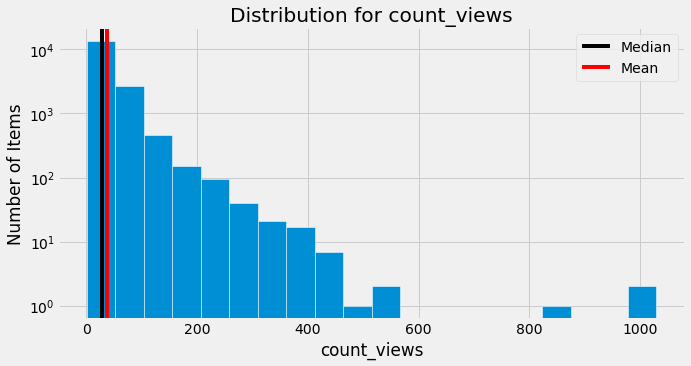

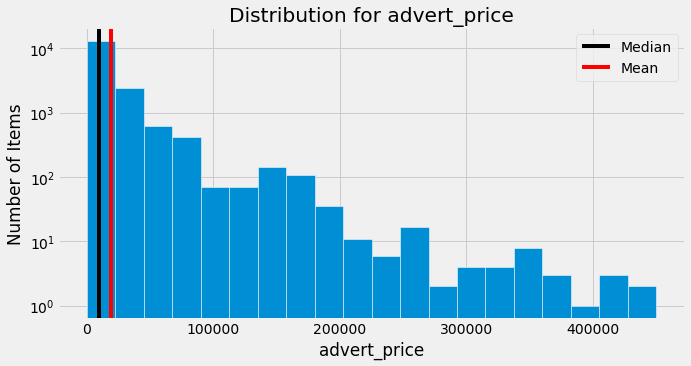

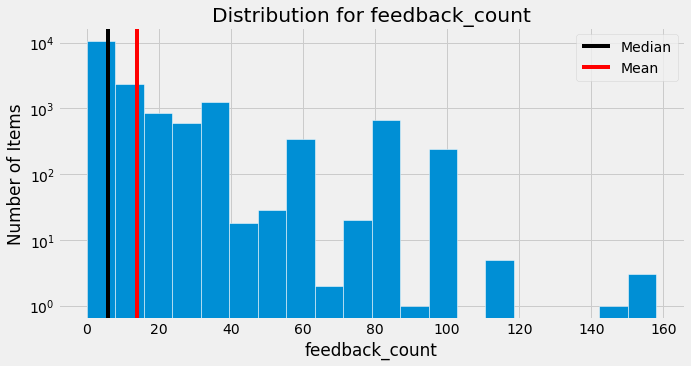

In [104]:
ls_numerical = ['count_images','count_views', 'advert_price', 'feedback_count']
for item in ls_numerical:
    plot_hist(item, True, 0.9999)
    

# Explore categorical variabls with bar plots

In [43]:
# Create a function that does bar plots for different categorical varaibles based on value_counts

In [119]:
def plot_bars(column_name, log_scale):
    # Step 1 Create a df based on the categorical variable
    df_data= df[column_name].value_counts().rename_axis(column_name).to_frame('counts').reset_index()
    df_data

    # step 2: get the variables to do the plots:
    x=df_data[column_name][:20]
    y=df_data['counts'][:20]
    total = df_data['counts'].sum()

    #step3 add details to the plots:
    plt.title(f'{column_name} (Total: {total})')
    plt.xlabel(column_name)
    plt.ylabel('Counts')
    plt.xticks(rotation=90)
    
    if (log_scale):
        plt.yscale('log')

    plt.bar(x,y)
    plt.show()
    

In [120]:
# plot_bars('Wheels and Parts', False)

In [121]:
# df.info()

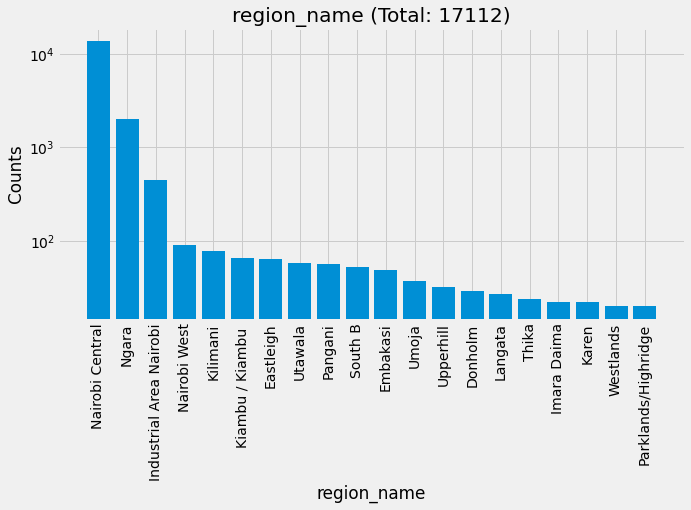

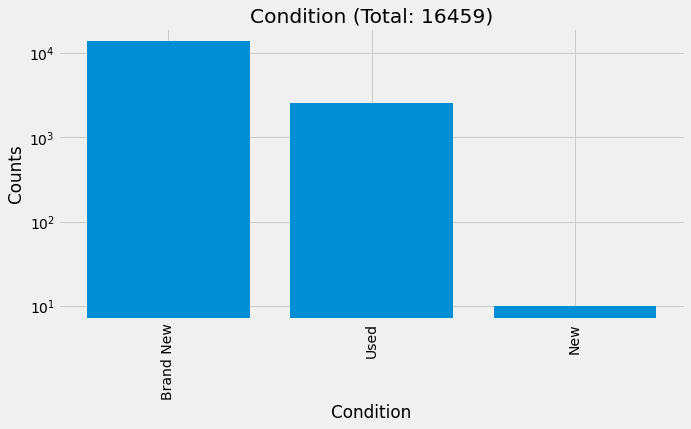

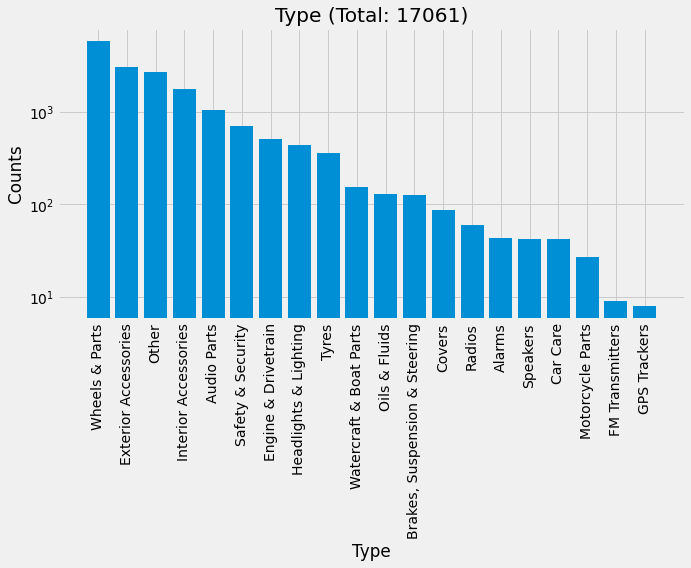

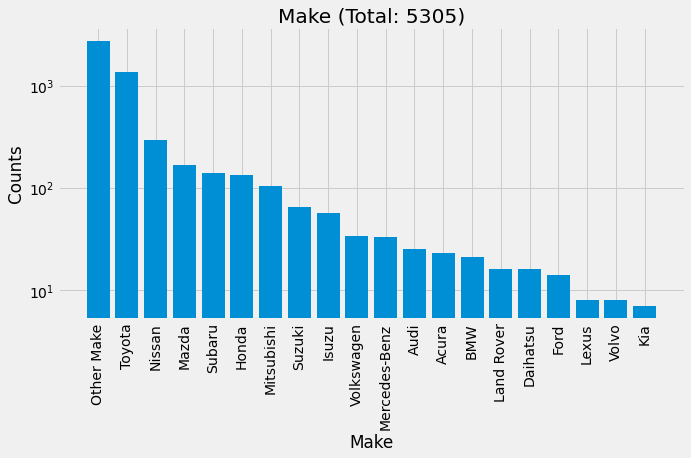

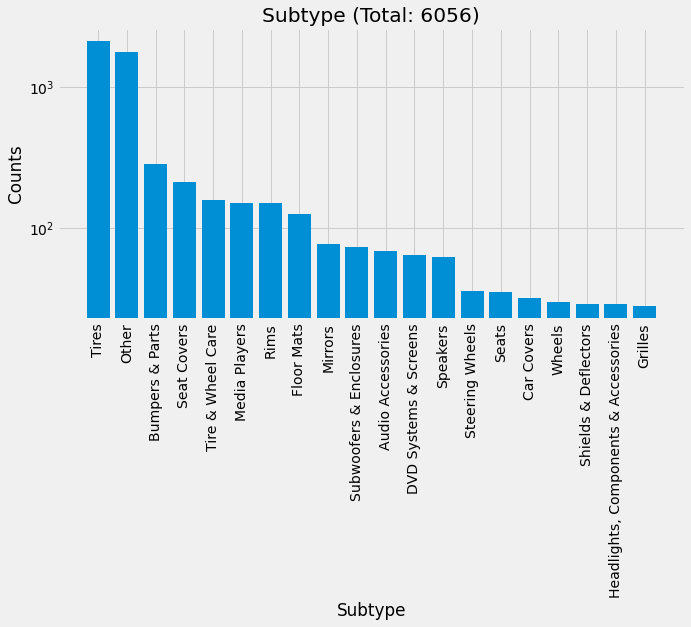

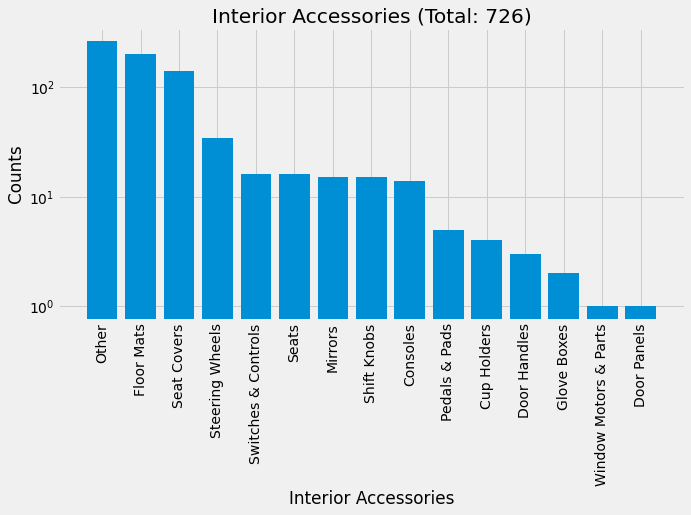

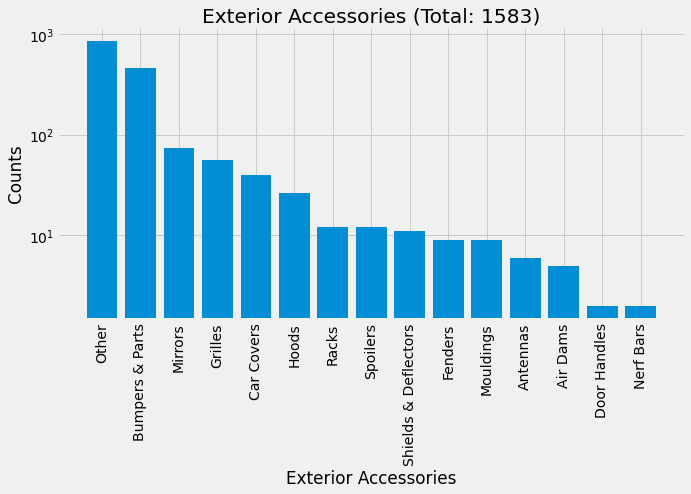

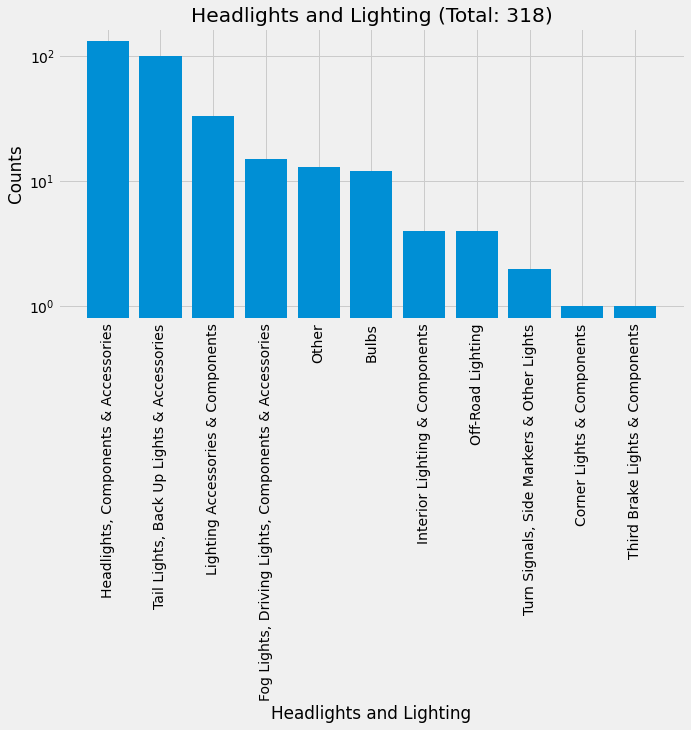

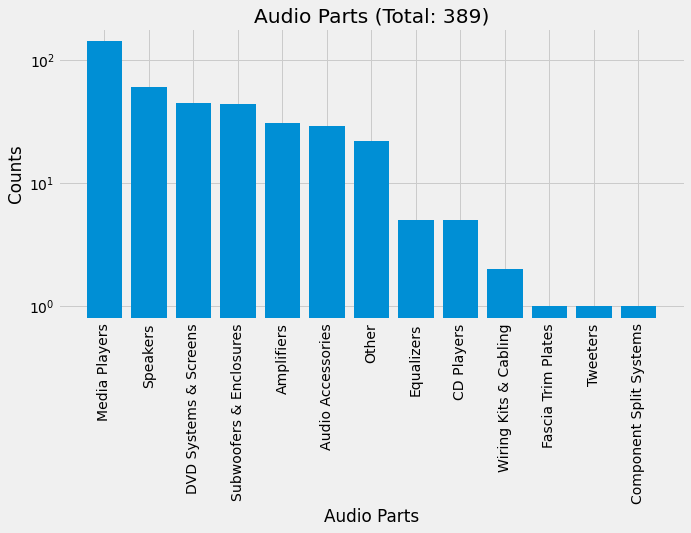

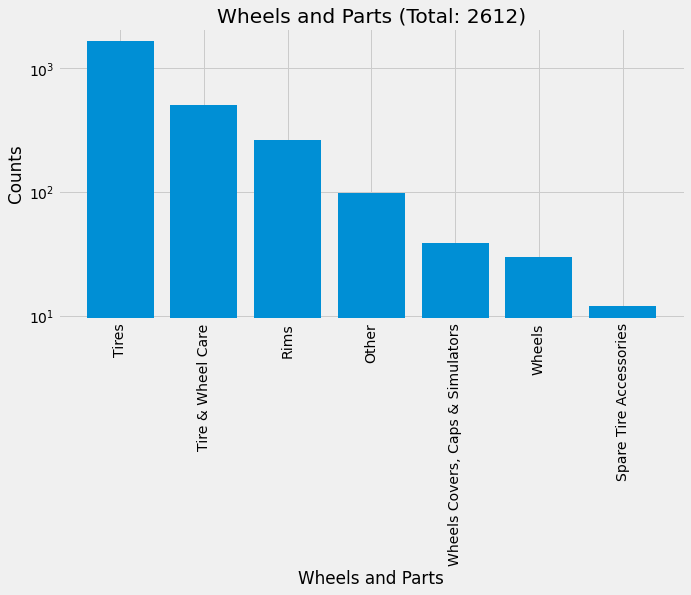

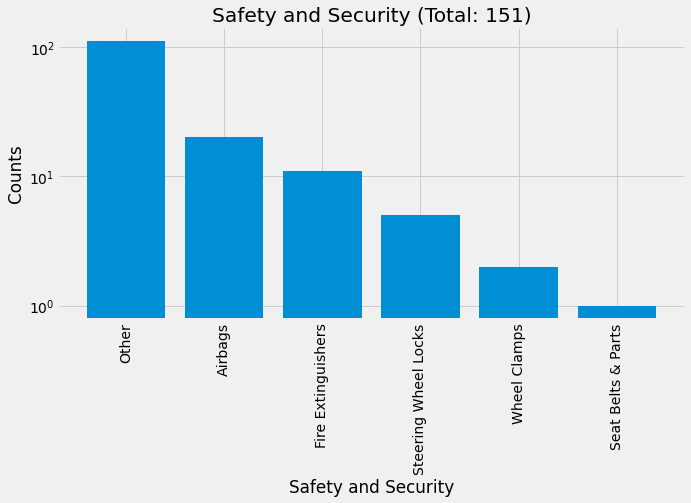

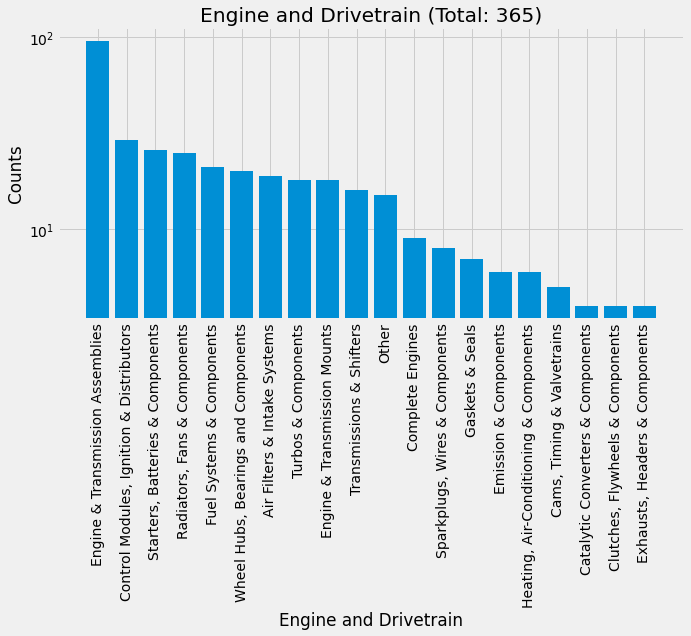

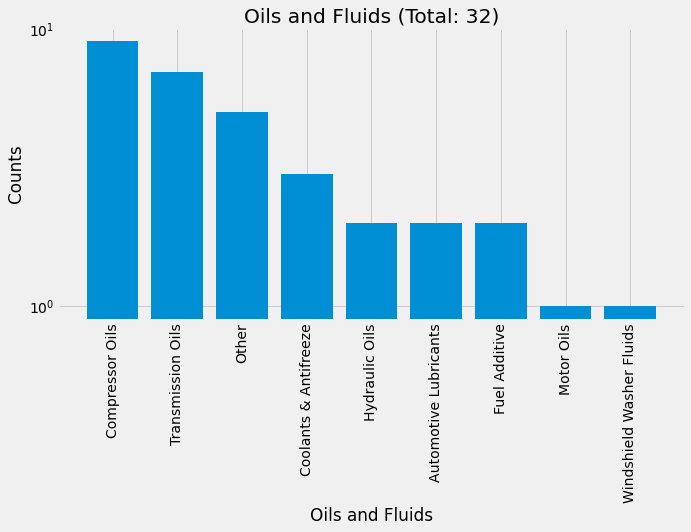

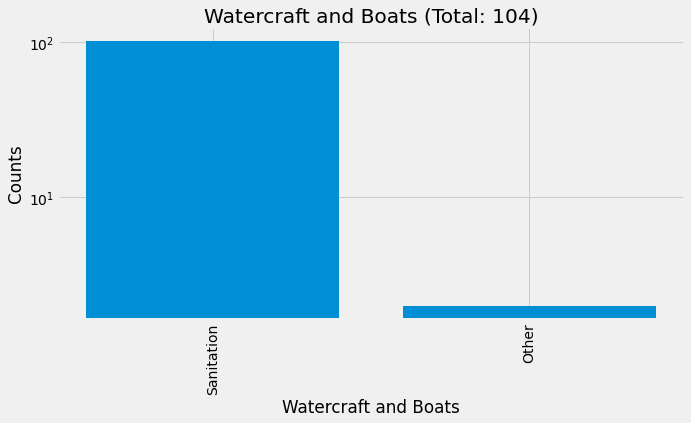

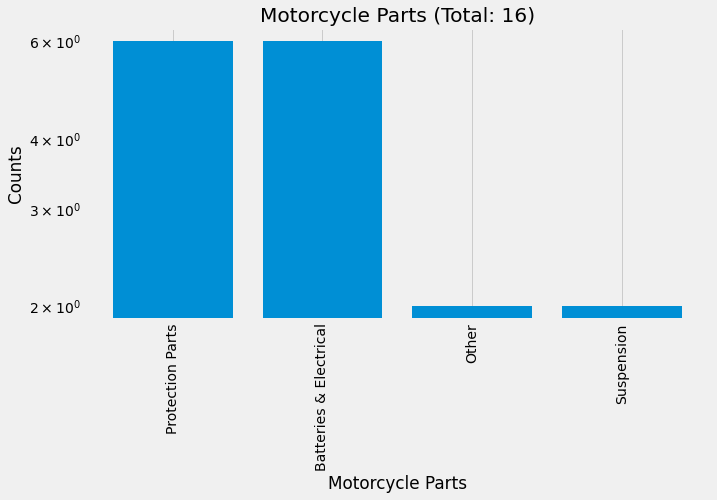

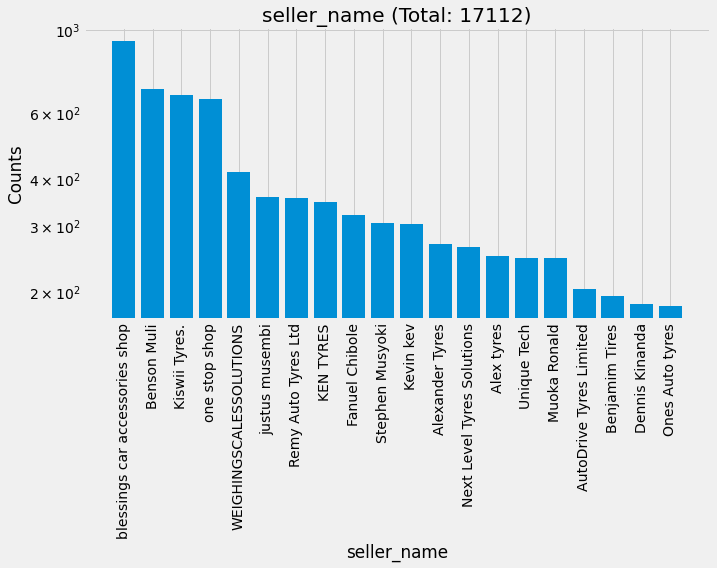

In [123]:
# df.columns
ls_categorical =['region_name', 'Condition','Type', 'Make', 'Subtype','Interior Accessories', 'Exterior Accessories','Headlights and Lighting', 'Audio Parts', 'Wheels and Parts','Safety and Security', 'Engine and Drivetrain', 'Oils and Fluids','Watercraft and Boats', 'Motorcycle Parts','seller_name']
for item in ls_categorical:
    plot_bars(item, True)

In [124]:
# Add info from basic data df